In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Nowcasts with experts' responses and model's outputs

In [12]:
q1_date = '2020-10-08'
q2_date = '2020-11-19'

In [57]:
data = pd.read_csv('data/df_SIVEP_nowcast_allStates_08-02-2021.csv')
def get_state_data(df, state):
    df_state = df.copy()
    if state == 'Brazil':
        df_state.drop(columns=['State'], inplace=True)
        columns = list(df_state.columns)
        columns.remove('Deaths')
        df_state = df_state.groupby(columns, as_index=False)['Deaths'].sum()
        return df_state
    return df_state[df_state['State'] == state]

data = get_state_data(data, 'Brazil')

data = data[data.Date >= '2020-06-30']
data = data[data.Date <= '2020-11-23']

data

,Date,Release,Date_index,Release_index,Deaths
5760,2020-06-30,2020-07-07,181,0,722
5761,2020-06-30,2020-07-14,181,7,933
5762,2020-06-30,2020-07-21,181,14,1025
5763,2020-06-30,2020-07-29,181,22,1091
5764,2020-06-30,2020-08-03,181,27,1116
...,...,...,...,...,...
8991,2020-11-23,2021-01-11,327,188,620
8992,2020-11-23,2021-01-18,327,195,629
8993,2020-11-23,2021-01-25,327,202,635
8994,2020-11-23,2021-02-01,327,209,640


In [58]:
data_test = data.copy()

In [59]:
now_q1= '2020-10-12'
data_test_q1 = data_test.copy()
data_test_q1 = data_test_q1[data_test_q1['Date'] <= now_q1] # remove the data above the nowcasting date
data_test_q1 = data_test_q1[data_test_q1['Release'] <= now_q1] 
date_index_for_guess_q1 = data_test_q1[data_test_q1['Date'] == q1_date]['Date_index'].values[0]
deaths_for_guess_q1 = data_test_q1[data_test_q1['Date'] == q1_date]['Deaths'].values[0]
true_deaths_q1 = data[data['Date'] == q1_date]['Deaths'].values[-1]

print('Date index for guess:', date_index_for_guess_q1)

print('Date:', q1_date)
print('Number of deaths pre-nowcast:', deaths_for_guess_q1)
print('Number of deaths reported on the latest release (truth):', true_deaths_q1)
print('Number of deaths occ to our nowcast:', 703)


Date index for guess: 281
Date: 2020-10-08
Number of deaths pre-nowcast: 370
Number of deaths reported on the latest release (truth): 715
Number of deaths occ to our nowcast: 703


In [60]:
now_q2= '2020-11-23'
data_test_q2 = data_test.copy()
data_test_q2 = data_test_q2[data_test_q2['Date'] <= now_q2] # remove the data above the nowcasting date
data_test_q2 = data_test_q2[data_test_q2['Release'] <= now_q2] 
date_index_for_guess_q2 = data_test_q2[data_test_q2['Date'] == q2_date]['Date_index'].values[0]
deaths_for_guess_q2 = data_test_q2[data_test_q2['Date'] == q2_date]['Deaths'].values[0]
true_deaths_q2 = data[data['Date'] == q2_date]['Deaths'].values[-1]

print('Date index for guess:', date_index_for_guess_q2)

print('Date:', q2_date)
print('Number of deaths pre-nowcast:', deaths_for_guess_q2)
print('Number of deaths reported on the latest release (truth):', true_deaths_q2)
print('Number of deaths occ to our nowcast:', 457)

Date index for guess: 323
Date: 2020-11-19
Number of deaths pre-nowcast: 293
Number of deaths reported on the latest release (truth): 557
Number of deaths occ to our nowcast: 457


## Experts response

In [34]:
experts_df = pd.read_csv('data/experts_response.csv')
experts = experts_df.copy()
experts.sort_values(by='Q1', inplace = True)
experts

,Time,Q1,Q1_low,Q1_high,Q2,Q2_low,Q2_high
6,2021/01/22 3:56:27 PM GMT,500,400,600,500,400,600
9,2021/01/22 4:47:54 PM GMT,500,600,400,300,350,250
10,2021/01/22 4:48:14 PM GMT,500,400,600,400,300,500
21,2021/01/22 7:00:30 PM GMT,500,400,600,350,300,400
14,2021/01/22 5:29:34 PM GMT,500,250,750,310,200,400
26,2021/01/23 9:00:09 AM GMT,522,422,622,68,0,168
8,2021/01/22 4:46:26 PM GMT,522,500,650,468,450,600
0,2021/01/22 3:06:14 PM GMT,550,480,570,370,320,390
20,2021/01/22 6:31:20 PM GMT,550,300,600,330,150,430
28,2021/01/23 9:46:58 AM GMT,560,500,600,400,350,450


### Figure 6

Median human guess for question 1 750.0
Median human guess for question 2 600.0


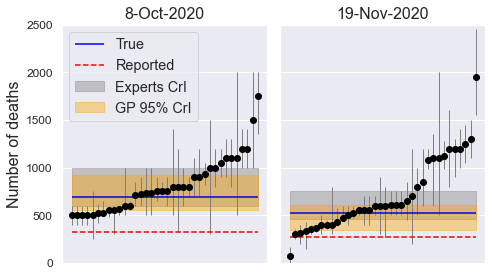

In [76]:
experts = experts_df.copy()
experts.sort_values(by='Q1', inplace = True)
experts = experts.reset_index()

fs = 16
x = experts.index
y = experts.Q1
yerr = [y-experts.Q1_low, experts.Q1_high-y]
print('Median human guess for question 1', y.median())

plt.figure(figsize=[7,4])

plt.subplot(1,2,1)
plt.errorbar(x, y, yerr=yerr, fmt='o', color='black',
             ecolor='gray', elinewidth=1, capsize=0);
plt.hlines(y=695, xmin=0, xmax=x[-1], color = 'blue', label = 'True')
plt.hlines(y=322, xmin=x[0], xmax=x[-1], color = 'red', ls = '--', label = 'Reported')


#plt.hlines(y.median(), xmin=x[0], xmax=x[-1], color = 'black', ls = ':', 
#           alpha = 0.7, label = 'Experts median')

plt.fill_between(x, experts.Q1_low.median(), experts.Q1_high.median(),
                 color='gray', alpha=0.4, label = 'Experts CrI')

plt.fill_between(x, 555, 917,
                 color='orange', alpha=0.4, label = 'GP 95% CrI')


plt.legend(loc='upper left', fontsize='large')
plt.xticks([])
plt.yticks(fontsize=12)
plt.ylim([0,2500])
plt.ylabel('Number of deaths',fontsize=fs)
plt.title('8-Oct-2020', fontsize=16)

experts.sort_values(by='Q2', inplace = True)
experts = experts.reset_index()
y = experts.Q2
yerr = [y-experts.Q2_low, experts.Q2_high-y]
print('Median human guess for question 2', y.median())
plt.subplot(1,2,2)
plt.errorbar(x, y, yerr=yerr, fmt='o', color='black',
             ecolor='gray', elinewidth=1, capsize=0);
plt.hlines(y=527, xmin=0, xmax=x[-1], color = 'blue', label = 'True')
plt.hlines(y=268, xmin=x[0], xmax=x[-1], color = 'red', ls = '--', label = 'Reported')
plt.title('19-Nov-2020', fontsize=16)


#plt.hlines(y.median(), xmin=x[0], xmax=x[-1], color = 'black', ls = ':', 
#           alpha = 0.7, label = 'Experts median')


plt.fill_between(x, experts.Q2_low.median(), experts.Q2_high.median(),
                 color='gray', alpha=0.4, label = 'Experts median interval')


plt.fill_between(x, 340, 604,
                 color='orange', alpha=0.4, label = 'GP nowcast 95% CrI')

plt.xticks([])
frame = plt.gca()
frame.axes.yaxis.set_ticklabels([])
plt.ylim([0,2500])
plt.tight_layout()

plt.show()
# plt.savefig('../nowcasting/figures/expert_guesses_points_sorted.pdf', bbox_inches='tight')    

In [36]:
print('\n')
print('Question 1: 08-10-2020')
model_ci_width = 917 - 555
human_ci_width = int(experts.Q1_high.median() - experts.Q1_low.median())
print('Model confidence interval width:', model_ci_width)
print('Human confidence interval width:', human_ci_width)


print('\n')
print('Question 2: 19-11-2020')
model_ci_width =  604 - 340
human_ci_width = int(experts.Q2_high.median() - experts.Q2_low.median())
print('Model confidence interval width:', model_ci_width)
print('Human confidence interval width:', human_ci_width)
print('\n')




Question 1: 08-10-2020
Model confidence interval width: 362
Human confidence interval width: 400


Question 2: 19-11-2020
Model confidence interval width: 264
Human confidence interval width: 287




### Supplement figure Fig S4

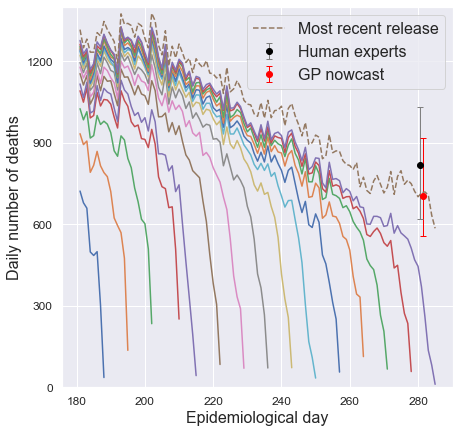

In [68]:
uniq_rel = data_test_q1.Release.unique()
uniq_rel_idx = data_test_q1.Release_index.unique()

plt.figure(figsize=(7,7))
y = data_test_q1.Deaths.values
for i in range(len(uniq_rel)):
    data_tmp = data_test_q1[data_test_q1['Release'] == uniq_rel[i]]
    plt.plot(data_tmp.Date_index, data_tmp.Deaths, label = '_' + str(uniq_rel_idx[i]))
    
# add the most recent release
data_tmp_recent = data[data['Release'] == data['Release'].values[-1]]
data_tmp_recent = data_tmp_recent[data_tmp_recent.Date > '2020-03-12']
plt.plot(data_tmp.Date_index,
         data_tmp_recent.Deaths.values[0:len(data_tmp.Date_index)],
         ls = '--',
         label = 'Most recent release')

plt.errorbar(date_index_for_guess_q1-0.5, experts.Q1.mean(), 
             yerr=np.array([[experts.Q1.mean()-experts.Q1_low.mean(), experts.Q1_high.mean()-experts.Q1.mean()]]).T,
             fmt='o', color='black',
             ecolor='gray', elinewidth=1, capsize=3,
            label = 'Human experts')

plt.errorbar(date_index_for_guess_q1+0.5, 703, 
             yerr=np.array([[703-555, 917-703]]).T,
             fmt='o', color='red',
             ecolor='red', elinewidth=1, capsize=3,
            label = 'GP nowcast')

plt.legend(ncol = 1, loc = 'upper right', fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(np.arange(0, max(y)+1, 300.0), fontsize=12)
plt.ylabel('Daily number of deaths', fontsize=16)
plt.xlabel('Epidemiological day', fontsize=16)

plt.ylim([0,1400])


plt.show()

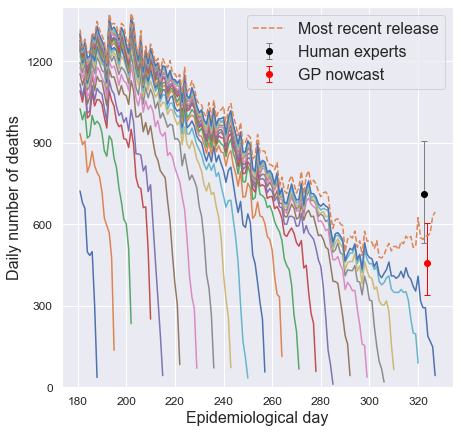

In [69]:
uniq_rel = data_test_q2.Release.unique()
uniq_rel_idx = data_test_q2.Release_index.unique()

plt.figure(figsize=(7,7))
y = data_test.Deaths.values
for i in range(len(uniq_rel)):
    data_tmp = data_test[data_test['Release'] == uniq_rel[i]]
    plt.plot(data_tmp.Date_index, data_tmp.Deaths, label = '_' + str(uniq_rel_idx[i]))

# add the most recent release
data_tmp_recent = data[data['Release'] == data['Release'].values[-1]]
data_tmp_recent = data_tmp_recent[data_tmp_recent.Date > '2020-03-12']
plt.plot(data_tmp.Date_index,
         data_tmp_recent.Deaths.values[0:len(data_tmp.Date_index)],
         ls = '--',
         label = 'Most recent release')


plt.errorbar(date_index_for_guess-0.5, experts.Q2.mean(), 
             yerr=np.array([[experts.Q2.mean()-experts.Q2_low.mean(), experts.Q2_high.mean()-experts.Q2.mean()]]).T,
             fmt='o', color='black',
             ecolor='gray', elinewidth=1, capsize=3,
            label = 'Human experts')

plt.errorbar(date_index_for_guess+0.5, 457, 
             yerr=np.array([[457-340, 604-457]]).T,
             fmt='o', color='red',
             ecolor='red', elinewidth=1, capsize=3,
            label = 'GP nowcast')

plt.legend(ncol = 1, loc = 'upper right', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(np.arange(0, max(y)+1, 300.0), fontsize=12)
plt.ylabel('Daily number of deaths', fontsize=16)
plt.xlabel('Epidemiological day', fontsize=16)

plt.ylim([0,1400])

plt.show()
